In [1]:
from wrappers.file_setup import CURRENT_EXPERIMENT
from wrappers.configreader import Config
from wrappers.file_setup import close_station, my_init
import qcodes as qc
from wrappers import *
from wrappers.transmon import *
%matplotlib nbagg

/Users/natalie/Documents/PhD/Qdev/Qcodes/qcodes/instrument/parameter.py:1315: UserWarning: Parameter single: `ManualParameter` is deprecated, use `Parameter` instead with `set_cmd=None`.
  '`Parameter` instead with `set_cmd=None`.'.format(self))


In [2]:
station = qc.Station()
my_init('floquet_test3', station, qubit_count=4, calib_config=True)

Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/natalie/Documents/PhD/Qdev/QcodesRelated/QcodesExperiments/Qcodes_test_data/floquet_test3/commands.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


In [3]:
gate_dict = pb.make_pulse_dict(qubit_indices=[0, 1, 2, 3],
                                SSBfreqs=[1e6, 1e6, 1e6, 1e6], gaussian=True,
                                drag=False, z_gates=False, SR=1e9)

In [4]:
set_current_qubit(1)

In [5]:
get_calibration_array('pi_pulse_sigma')

[3e-08, 3e-08, 3e-08, 3e-08]

In [6]:
set_calibration_val('pi_pulse_sigma', 30e-9)

In [7]:
c = pb.make_sequence_from_gate_lists([['X', 'Y/2'], ['Y']],
                                    SSBfreq=50e6,
                                    channels=[1, 2, 3, 4])

sequence check passed: 2 elements


ch  1 :  wait|X_I    |Y/2_I  |wait|wait_measurement  |wait
ch  2 :  wait|X_Q    |Y/2_Q  |wait|wait_measurement  |wait
ch  3 :  wait|XY_wait|XY_wait|wait|wait_measurement  |wait
ch  4 :  wait|XY_wait|XY_wait|wait|cavity_measurement|wait


<IPython.core.display.Javascript object>


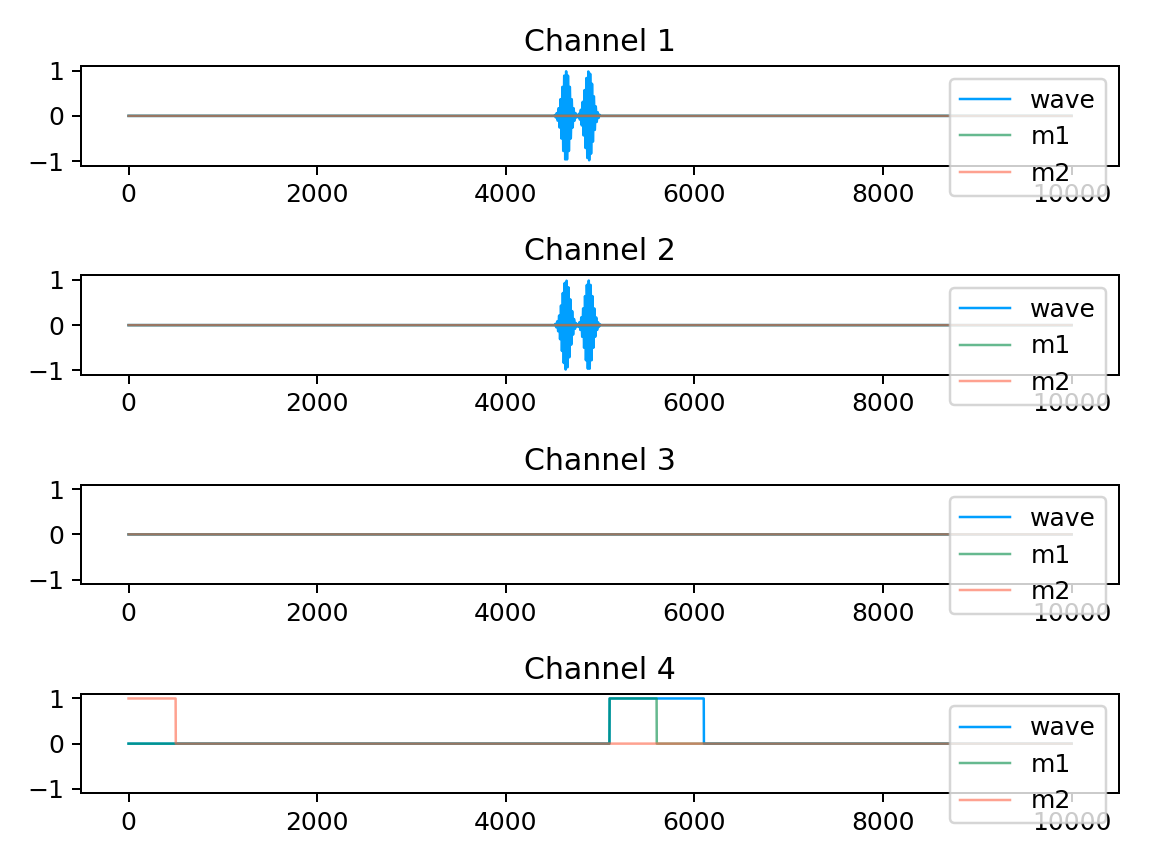

In [8]:
c.print_segment_lists()
p = c.plot(elemnum=0)

In [20]:
allxy = pb.make_allxy_sequence(gaussian=False, drag=False,
                               SSBfreq=None, spacing=None)

sequence check passed: 21 elements


ch  1 :  wait|XY_wait|XY_wait|wait|wait_measurement  |wait
ch  2 :  wait|XY_wait|XY_wait|wait|wait_measurement  |wait
ch  3 :  wait|XY_wait|XY_wait|wait|wait_measurement  |wait
ch  4 :  wait|XY_wait|XY_wait|wait|cavity_measurement|wait


<IPython.core.display.Javascript object>


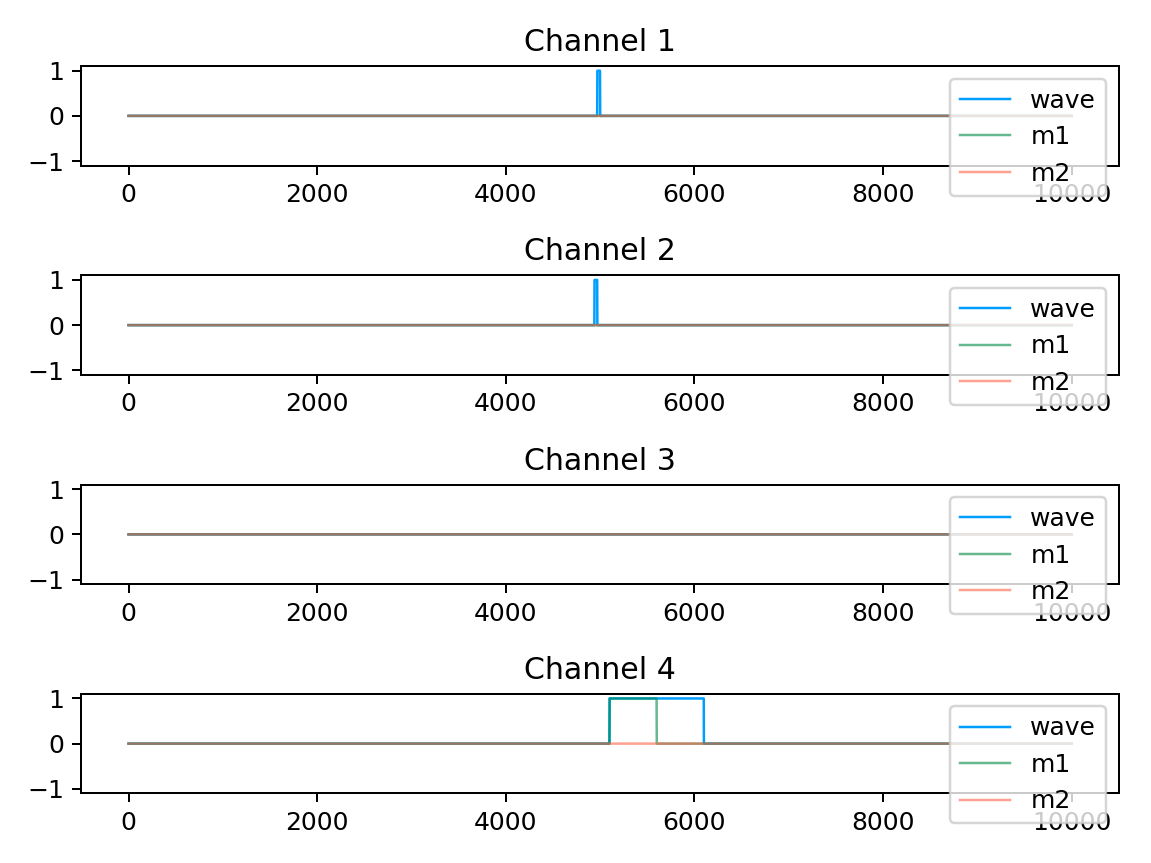

In [26]:
allxy.print_segment_lists()
p = allxy.plot(elemnum=12)

In [34]:
bench = pb.make_benchmarking_sequence(2, 1)

sequence check passed: 1 elements


ch  1 :  wait|-pi/2  |XY_wait|pi/2   |-pi/2  |XY_wait|pi/2   |XY_wait|pi     |wait|wait_measurement  |wait
ch  2 :  wait|XY_wait|pi/2   |XY_wait|XY_wait|pi/2   |XY_wait|pi     |XY_wait|wait|wait_measurement  |wait
ch  3 :  wait|XY_wait|XY_wait|XY_wait|XY_wait|XY_wait|XY_wait|XY_wait|XY_wait|wait|wait_measurement  |wait
ch  4 :  wait|XY_wait|XY_wait|XY_wait|XY_wait|XY_wait|XY_wait|XY_wait|XY_wait|wait|cavity_measurement|wait


<IPython.core.display.Javascript object>


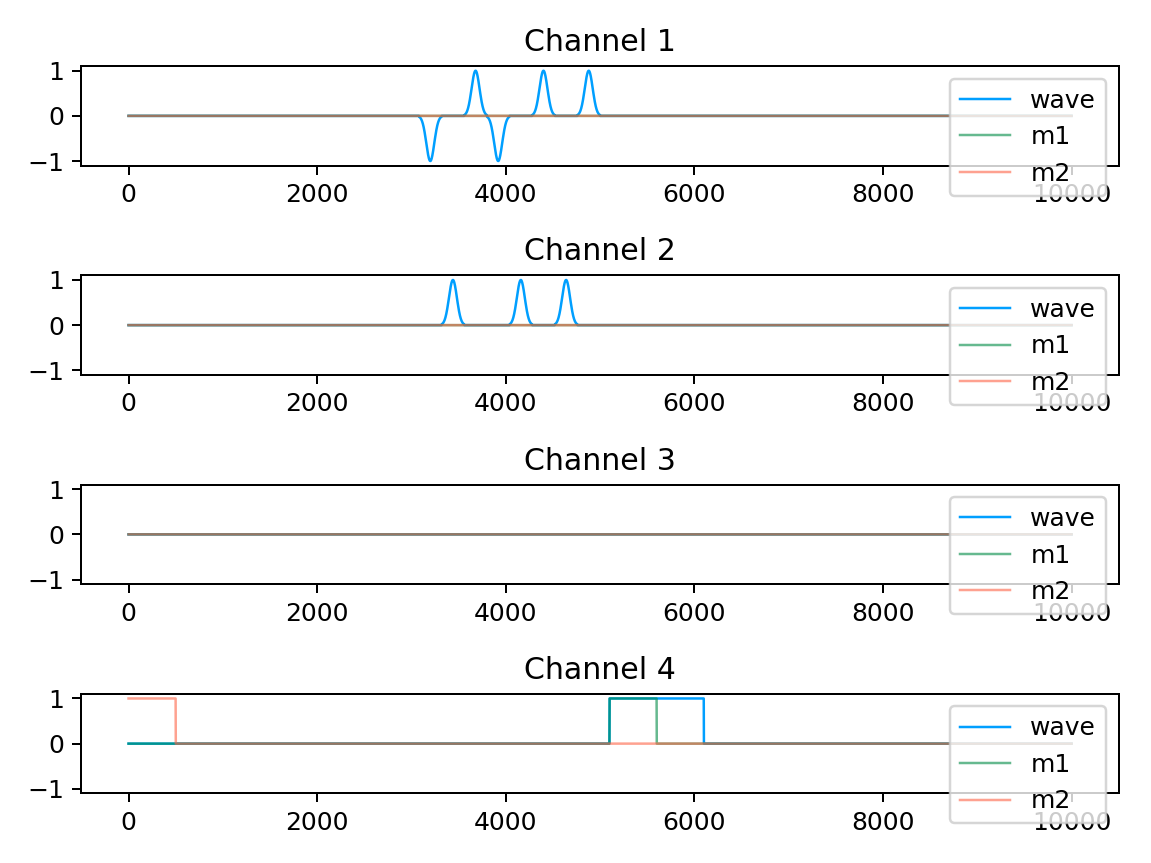

In [35]:
bench.print_segment_lists()
p = bench.plot()